In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [5]:
with_mask_files = os.listdir('data/with_mask')

In [6]:
without_mask_files = os.listdir('data/without_mask')

In [9]:
print(with_mask_files[0:10])

['with_mask_1.jpg', 'with_mask_10.jpg', 'with_mask_100.jpg', 'with_mask_1000.jpg', 'with_mask_1001.jpg', 'with_mask_1002.jpg', 'with_mask_1003.jpg', 'with_mask_1004.jpg', 'with_mask_1005.jpg', 'with_mask_1006.jpg']


In [10]:
print(without_mask_files[0:10])

['without_mask_10.jpg', 'without_mask_100.jpg', 'without_mask_1000.jpg', 'without_mask_1001.jpg', 'without_mask_1002.jpg', 'without_mask_1003.jpg', 'without_mask_1004.jpg', 'without_mask_1005.jpg', 'without_mask_1006.jpg', 'without_mask_1007.jpg']


In [13]:
print("Number of with mask images: ",len(with_mask_files))
print("Number of without mask images: ",len(without_mask_files))
print("Total Number of Images: ", len(with_mask_files) + len(without_mask_files))

Number of with mask images:  3725
Number of without mask images:  3827
Total Number of Images:  7552


In [ ]:
# with mask -> 1
# without mask -> 0
# 4 images
# 2. face mask.jpg , face mask.jpg [1,1]
# 2. face without mask.jpg, face without mask.jpg [0,0]
# [0.5, 0.7, 0.8 ....] [1]

In [14]:
with_mask_labels = [1] * 3725
without_mask_labels = [0] * 3827

In [15]:
len(with_mask_labels)

3725

In [16]:
len(without_mask_labels)

3827

In [17]:
labels = with_mask_labels + without_mask_labels

In [20]:
labels[-2]

0

In [21]:
len(labels)

7552

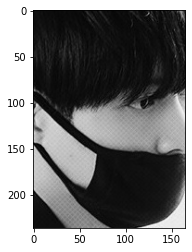

In [22]:
# with mask
img = mpimg.imread('data/with_mask/with_mask_1003.jpg')
imgplot = plt.imshow(img)
plt.show()

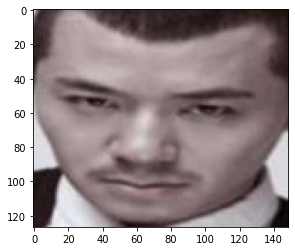

In [24]:
# without mask
img = mpimg.imread('data/without_mask/without_mask_100.jpg')
imgplot = plt.imshow(img)
plt.show()

In [25]:
# Convert image into numpy array + resize +RGB

In [28]:
with_mask_path = 'data/with_mask/'

data = []
for img_file in with_mask_files:
    image = Image.open(with_mask_path+img_file) # cv2.imread(with_mask_path+img_file)
    
    image = image.resize((128,128)) # cv2.resize(image, (128,128))
    
    image = image.convert('RGB') # cv2.cvtColor(image, COLOR_BGR2RGB)
    
    image = np.array(image)
    data.append(image)

In [29]:
without_mask_path = 'data/without_mask/'

for img_file in without_mask_files:
    image = Image.open(without_mask_path+img_file) # cv2.imread(without_mask_path+img_file)
    
    image = image.resize((128,128)) # cv2.resize(image, (128,128))
    
    image = image.convert('RGB') # cv2.cvtColor(image, COLOR_BGR2RGB)
    
    image = np.array(image)
    data.append(image)

In [30]:
len(data)

7552

In [31]:
type(data)

list

In [32]:
data[0]

array([[[50, 58, 31],
        [46, 55, 33],
        [56, 58, 42],
        ...,
        [27, 32, 25],
        [29, 33, 19],
        [33, 40, 17]],

       [[47, 54, 30],
        [49, 58, 36],
        [59, 63, 40],
        ...,
        [18, 21, 11],
        [37, 42, 31],
        [31, 41, 23]],

       [[51, 58, 37],
        [50, 59, 37],
        [59, 64, 37],
        ...,
        [45, 44, 30],
        [29, 34, 27],
        [20, 30, 18]],

       ...,

       [[63, 73, 37],
        [66, 75, 41],
        [74, 84, 50],
        ...,
        [ 5,  3,  0],
        [20, 19, 14],
        [17, 16, 12]],

       [[58, 72, 34],
        [60, 70, 39],
        [68, 75, 49],
        ...,
        [16, 15, 12],
        [15, 13, 10],
        [13,  9,  7]],

       [[53, 69, 30],
        [53, 64, 37],
        [57, 64, 42],
        ...,
        [18, 18, 16],
        [16, 13, 12],
        [19, 12, 13]]], dtype=uint8)

In [33]:
data[0].shape

(128, 128, 3)

In [34]:
X = np.array(data)
Y = np.array(labels)

In [38]:
print(Y)

[1 1 1 ... 0 0 0]


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [43]:
X_test.shape

(1511, 128, 128, 3)

In [44]:
X_train_scale = X_train/255
X_test_scale = X_test/255

In [46]:
X_train_scale.shape

(6041, 128, 128, 3)

In [48]:
# reshaped -> (Number of image, width, height , channel)

In [49]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [50]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size = (2,2)))
          
model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2))) 
          
model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(2, activation = "sigmoid"))

In [60]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['acc'])

In [61]:
history = model.fit(X_train_scale, y_train, validation_split = 0.1, epochs = 5)

Epoch 1/5
170/170 [==============================] - 339s 2s/step - loss: 0.4544 - acc: 0.7943 - val_loss: 0.2715 - val_acc: 0.8909
Epoch 2/5
170/170 [==============================] - 323s 2s/step - loss: 0.3076 - acc: 0.8813 - val_loss: 0.2584 - val_acc: 0.8959
Epoch 3/5
170/170 [==============================] - 286s 2s/step - loss: 0.2519 - acc: 0.9049 - val_loss: 0.2162 - val_acc: 0.9041
Epoch 4/5
170/170 [==============================] - 361s 2s/step - loss: 0.2273 - acc: 0.9126 - val_loss: 0.1959 - val_acc: 0.9339
Epoch 5/5
170/170 [==============================] - 356s 2s/step - loss: 0.1923 - acc: 0.9294 - val_loss: 0.1705 - val_acc: 0.9306


In [62]:
loss, accuracy = model.evaluate(X_test_scale, y_test)

48/48 [==============================] - 35s 715ms/step - loss: 0.1911 - acc: 0.9246


In [64]:
print("Loss is: ",loss)
print("Accuracy is: ",accuracy)

Loss is:  0.19109097123146057
Accuracy is:  0.9245532751083374


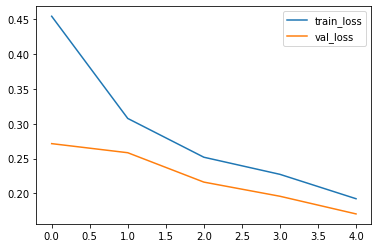

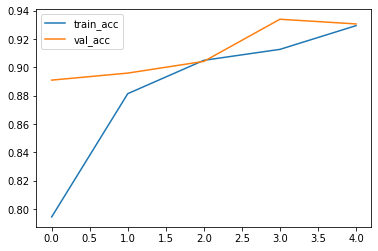

In [65]:
plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

plt.plot(history.history['acc'], label = 'train_acc')
plt.plot(history.history['val_acc'], label = 'val_acc')
plt.legend()
plt.show()

In [66]:
model.save("model.h5")